In [129]:
# Dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
#Import the sqlalchemy extract function.
from sqlalchemy import extract
# query that filters the Measurement table to retrieve the temperatures for the month of June. 
month_june = session.query(Measurement.tobs).filter(extract('month',Measurement.date)== 6).all()

In [7]:
# Convert to list
june_temps = list(month_june)

In [47]:
# Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['June Temps'])
june_temps_df.sort_index()
june_temps_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [48]:
#Summary Stats
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [52]:
#Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month_dec= session.query(Measurement.tobs).filter(extract('month',Measurement.date)== 12).all()

In [56]:
#Convert the December temperatures to a list.
dec_temps = list(month_dec)

In [57]:
#Convert to dataframe
dec_temps_df = pd.DataFrame(dec_temps, columns=['December Temps'])
dec_temps_df.sort_index()
dec_temps_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [46]:
# Summary Stats
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Follow-up Queries

In [107]:
#query 1
#plot of all temperatures across year round and summary stats
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                                   'November', 'December']
#creating dataframe before loop
results_df =pd.DataFrame()

#loop through for all 12 months
for num in range(0,12):
    
    #query for temps in each month
    month_temp = pd.DataFrame(list(session.query(Measurement.tobs).\
        filter(extract('month',Measurement.date)==num+1).all()))
    
    #adding data to df
    results_df[months[num]] = month_temp
    
results_df.describe()

,January,February,March,April,May,June,July,August,September,October,November,December
count,1727.000000,1610.000000,1693.000000,1713.000000,1727.000000,1700.000000,1711.000000,1622.000000,1480.000000,1556.000000,1488.000000,1517.000000
mean,68.726115,69.442236,70.059067,72.357268,73.685582,74.944118,76.082408,76.412454,76.164865,75.391388,73.252688,71.041529
std,4.367892,3.981399,3.845271,3.632131,3.359519,3.257417,3.356532,3.453138,3.535178,3.545084,3.617282,3.745920
min,54.000000,56.000000,56.000000,53.000000,63.000000,64.000000,61.000000,65.000000,64.000000,64.000000,61.000000,56.000000
25%,66.000000,67.000000,68.000000,70.000000,71.000000,73.000000,74.000000,74.000000,74.000000,73.000000,71.000000,69.000000
50%,69.000000,70.000000,70.000000,73.000000,74.000000,75.000000,76.000000,76.000000,76.000000,76.000000,74.000000,71.000000
75%,72.000000,72.000000,73.000000,75.000000,76.000000,77.000000,78.000000,79.000000,79.000000,78.000000,76.000000,74.000000
max,81.000000,83.000000,82.000000,84.000000,87.000000,85.000000,87.000000,87.000000,87.000000,86.000000,83.000000,83.000000


Text(0.5, 1.0, 'Temperature Frequencies')

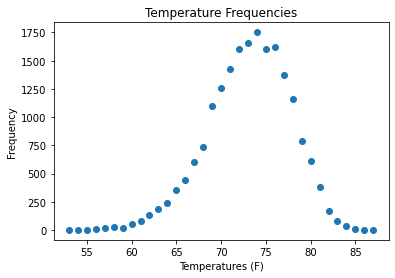

In [139]:
#query 2 temperature frequency

#query to get temp frequency
results_df = pd.DataFrame(session.query(Measurement.tobs, func.count(Measurement.tobs)).group_by(Measurement.tobs).\
order_by(func.count(Measurement.tobs).desc()).all(), columns=['Temperature', 'Frequency'])

#plotting
plt.scatter(x=results_df['Temperature'], y=results_df['Frequency'])
plt.xlabel('Temperatures (F)')
plt.ylabel('Frequency')
plt.title('Temperature Frequencies')